<a href="https://colab.research.google.com/github/Winonymous/AI-Hacktober-MLSA/blob/First_project/Project_1/Image_Classification_Winonymous/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Project

In [1]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory # This is adviced in replace of Image Data Generator is depreciated and it those not allow image processing to happen on the GPU
import pandas as pd
import matplotlib.pyplot as plt
import random

# Explore the data

In [2]:
!git clone https://github.com/mlsanigeria/AI-Hacktober-MLSA.git

fatal: destination path 'AI-Hacktober-MLSA' already exists and is not an empty directory.


In [3]:
# data_dir = "/media/lolade/New Volume/Programming/Projects/Github/AI-Hacktober-MLSA/Project_1/Data"
data_dir = "/content/AI-Hacktober-MLSA/Project_1/Data"

for dir, folders, files in os.walk(data_dir):
    print(f"{dir} contains {len(folders)} folders and {len(files)} files")

/content/AI-Hacktober-MLSA/Project_1/Data contains 3 folders and 0 files
/content/AI-Hacktober-MLSA/Project_1/Data/Storey-building contains 0 folders and 619 files
/content/AI-Hacktober-MLSA/Project_1/Data/High-rise contains 0 folders and 168 files
/content/AI-Hacktober-MLSA/Project_1/Data/Bungalow contains 0 folders and 404 files


Hence there are 3 classes <br>
229 images of Bungalow <br>
72 images of High-rise buildings <br>
486 images of Storey-buildings <br>

Storybuilding_aj_03.jpeg
ay_high_rise (20).jpeg
ayn_bungalow (42).jpeg


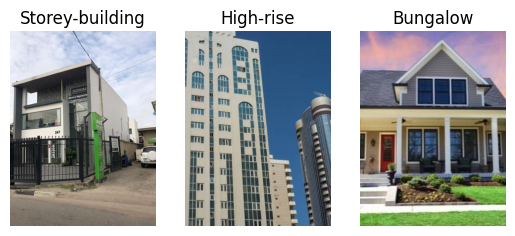

In [4]:
# Define paths for data
class_names = os.listdir(data_dir)

for index, cla in enumerate(class_names):
    class_dir = os.path.join(data_dir, cla)
    image_name = random.choice(os.listdir(class_dir))
    print(image_name)
    plt.subplot(1, 3, index + 1)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"{cla}")

# Define Constants

In [5]:
IMAGE_HEIGHT = 160 # The height the image is to be resized to
IMAGE_WIDTH = 160 # The width the image is to be resized to
IMG_SIZE  = (IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 32

# Implement Data Generators and Preprocessing pipeline

**This will create an easy preprocessing pipeline and will help load your data in batches**

In [6]:
print("The Training Dataset")
train_dataset = image_dataset_from_directory(data_dir, # The directory where the image dataset is stored
                                            seed = 32, # When spliiting the dataset we must use the seed parameter to improve its accuracy
                                            shuffle = True, # Shuffle the dataset
                                            batch_size = BATCH_SIZE, # Divide the dataset into 32 parts
                                            image_size = IMG_SIZE,
                                            validation_split = 0.2,
                                            label_mode = "categorical",
                                            subset = 'training') # The size of the image

print("The Validation Dataset")
Validation_dataset = image_dataset_from_directory(data_dir, # The directory where the image dataset is stored
                                            seed = 32, # When spliiting the dataset we must use the seed parameter to improve its accuracy
                                            shuffle = True, # Shuffle the dataset
                                            batch_size = BATCH_SIZE, # Divide the dataset into 32 parts
                                            label_mode = "categorical",
                                            image_size = IMG_SIZE,
                                            validation_split = 0.2,
                                            subset = 'validation')

The Training Dataset
Found 1191 files belonging to 3 classes.
Using 953 files for training.
The Validation Dataset
Found 1191 files belonging to 3 classes.
Using 238 files for validation.


## Create a base model

In [7]:
# Define the model architecture
Basemodel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for building types
])

# Compile the model
Basemodel.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



## Train the model

In [8]:
Basehistory = Basemodel.fit(
    train_dataset,
    epochs=10,
    validation_data=Validation_dataset
)

Epoch 1/10
30/30 [==============================] - 11s 149ms/step - loss: 107.2325 - accuracy: 0.4911 - val_loss: 1.4527 - val_accuracy: 0.6429
Epoch 2/10
30/30 [==============================] - 3s 93ms/step - loss: 0.5723 - accuracy: 0.7775 - val_loss: 1.0396 - val_accuracy: 0.6975
Epoch 3/10
30/30 [==============================] - 2s 62ms/step - loss: 0.1946 - accuracy: 0.9182 - val_loss: 1.0525 - val_accuracy: 0.7269
Epoch 4/10
30/30 [==============================] - 3s 75ms/step - loss: 0.1141 - accuracy: 0.9612 - val_loss: 1.1615 - val_accuracy: 0.7227
Epoch 5/10
30/30 [==============================] - 3s 79ms/step - loss: 0.0839 - accuracy: 0.9769 - val_loss: 1.4515 - val_accuracy: 0.6933
Epoch 6/10
30/30 [==============================] - 3s 75ms/step - loss: 0.0832 - accuracy: 0.9801 - val_loss: 1.2777 - val_accuracy: 0.6975
Epoch 7/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0678 - accuracy: 0.9853 - val_loss: 1.3466 - val_accuracy: 0.6891
Epoch 8/1

## Evaluate the model

In [9]:
Base_loss, Base_acc = Basemodel.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {Base_acc*100:.2f}%')

8/8 - 0s - loss: 1.2447 - accuracy: 0.7017 - 230ms/epoch - 29ms/step
Test accuracy: 70.17%


In [10]:
def plot_loss_curves(history):
  df = pd.DataFrame(history.history)

  ax = plt.subplot(2,1, 1)
  df[['loss', 'val_loss']].plot(ax =ax)
  plt.title("Loss")

  ax = plt.subplot(2,1, 2)
  df[['accuracy', 'val_accuracy']].plot(ax = ax)
  plt.title("Accuracy")

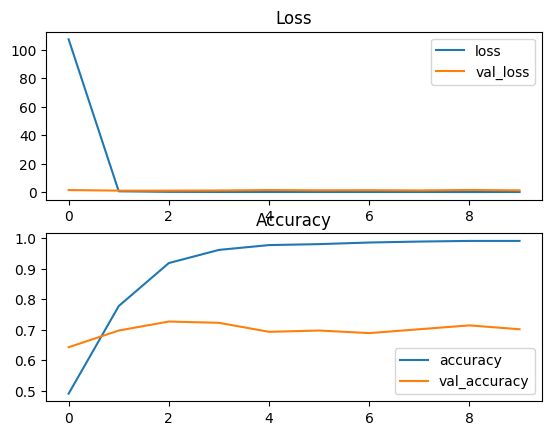

In [11]:
plot_loss_curves(Basehistory)

It looks like the model is overfitting. Lets try to add data Augumentation and see the results

In [12]:
from tensorflow.keras.layers.experimental import preprocessing

Preprocesing_layer = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.Rescaling(1./255.),
    tf.keras.layers.Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
], name = 'Augumentation_layer')

images (63).jpeg
ayn_highrise (58).jpeg
IMG-20231002-WA0081.jpeg


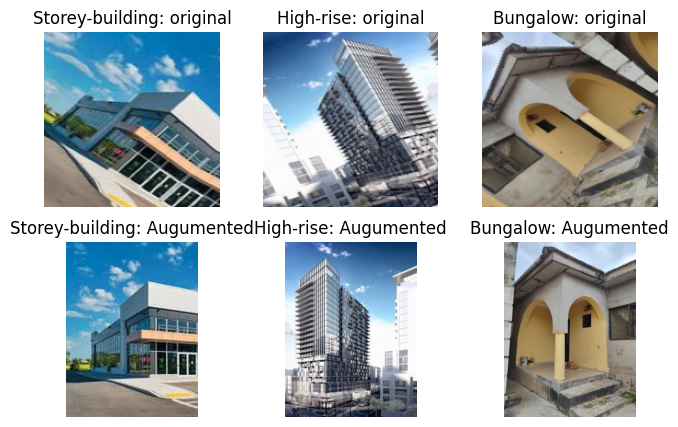

In [13]:
# Lets test it

# Define paths for data
class_names = os.listdir(data_dir)

plt.figure(figsize=(8, 5))

for index, cla in enumerate(class_names):
    class_dir = os.path.join(data_dir, cla)
    image_name = random.choice(os.listdir(class_dir))
    print(image_name)
    plt.subplot(2, 3, index + 1)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(Preprocesing_layer(img))
    plt.axis(False)
    plt.title(f"{cla}: original")
    plt.subplot(2, 3, index + 1 + 3)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"{cla}: Augumented")

Seams like the layer is working well lets train a new model

In [14]:
# Define the model architecture
Augmodel = tf.keras.Sequential([
    Preprocesing_layer,
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for building types
])

# Compile the model
Augmodel.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
Aughistory = Augmodel.fit(
    train_dataset,
    epochs=10,
    validation_data=Validation_dataset
)

Epoch 1/10
30/30 [==============================] - 4s 45ms/step - loss: 1.3960 - accuracy: 0.5110 - val_loss: 1.0158 - val_accuracy: 0.4664
Epoch 2/10
30/30 [==============================] - 1s 41ms/step - loss: 0.9001 - accuracy: 0.5414 - val_loss: 0.9578 - val_accuracy: 0.4790
Epoch 3/10
30/30 [==============================] - 1s 38ms/step - loss: 0.8440 - accuracy: 0.5719 - val_loss: 0.8491 - val_accuracy: 0.5924
Epoch 4/10
30/30 [==============================] - 1s 39ms/step - loss: 0.8388 - accuracy: 0.6013 - val_loss: 0.8564 - val_accuracy: 0.5168
Epoch 5/10
30/30 [==============================] - 1s 40ms/step - loss: 0.7860 - accuracy: 0.6296 - val_loss: 0.8680 - val_accuracy: 0.6261
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.7802 - accuracy: 0.6254 - val_loss: 1.0794 - val_accuracy: 0.5210
Epoch 7/10
30/30 [==============================] - 2s 63ms/step - loss: 0.7616 - accuracy: 0.6317 - val_loss: 0.7786 - val_accuracy: 0.6555
Epoch 8/10
30

In [16]:
Aug_loss, Aug_acc = Augmodel.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {Aug_acc*100:.2f}%')

8/8 - 0s - loss: 0.8878 - accuracy: 0.6387 - 284ms/epoch - 36ms/step
Test accuracy: 63.87%


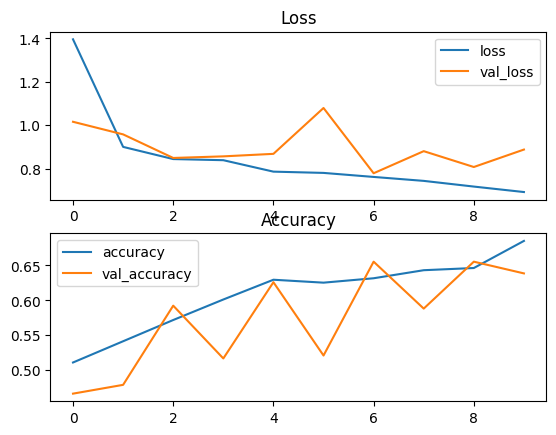

In [17]:
plot_loss_curves(Aughistory)

Now the loss functions seems similar. <br>
So let try training the model for longer and check the performance over the period of time. But we would had an
1. `Earlystopping` callback so it stops when it reaches a particular performace
2. `ModelCheckpoint` to save the best model at each checkpoint

In [18]:
from keras.src.callbacks import EarlyStopping
# Create EarlyStopping and
filepath = "./Model/Augmodel"

Modelckpt = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    save_best_only = True
)

EarlyStopping = tf.keras.callbacks.EarlyStopping(patience = 5)

In [19]:
# Compile the model
Augmodel.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [20]:
longAughistory = Augmodel.fit(
    train_dataset,
    epochs=500,
    validation_data=Validation_dataset,
    callbacks = [Modelckpt, EarlyStopping]
)

Epoch 1/500
30/30 [==============================] - 6s 159ms/step - loss: 0.7468 - accuracy: 0.6380 - val_loss: 0.8429 - val_accuracy: 0.6429
Epoch 2/500
30/30 [==============================] - 1s 41ms/step - loss: 0.6897 - accuracy: 0.6663 - val_loss: 0.8661 - val_accuracy: 0.6513
Epoch 3/500
30/30 [==============================] - 1s 40ms/step - loss: 0.6967 - accuracy: 0.6642 - val_loss: 1.0296 - val_accuracy: 0.6387
Epoch 4/500
30/30 [==============================] - 1s 38ms/step - loss: 0.7149 - accuracy: 0.6453 - val_loss: 0.8688 - val_accuracy: 0.6807
Epoch 5/500
30/30 [==============================] - 1s 42ms/step - loss: 0.6755 - accuracy: 0.6737 - val_loss: 0.9686 - val_accuracy: 0.6345
Epoch 6/500
30/30 [==============================] - 1s 37ms/step - loss: 0.6650 - accuracy: 0.6936 - val_loss: 0.9046 - val_accuracy: 0.6471


It looks like the model would not improve no matter how long we train it for so lets try to use so pretrained model. We would experiment with
1. EfficientNet
2. MobileNet
3. Resnet

## RESNET 50

In [21]:
resnet50_url = 'https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5'

In [22]:
import tensorflow_hub as hub

def basefinetunemodel(url):
  extraction_layer = hub.KerasLayer(url,
                      trainable = False,
                      name = 'Feature_Extraction_Layer',
                      input_shape = IMG_SIZE + (3, ))

  # Model
  model = tf.keras.Sequential([
      Preprocesing_layer,
      extraction_layer,
      tf.keras.layers.Dense(3,
                            activation = 'softmax',
                            name = 'Output_Layer')
  ])

  return model

In [24]:
model_resnet = basefinetunemodel(resnet50_url)

model_resnet.compile(loss = "categorical_crossentropy",
                        optimizer = 'Adam',
                        metrics = ['accuracy'])

In [25]:
resnet_model_history = model_resnet.fit(
    train_dataset,
    epochs=10,
    validation_data=Validation_dataset
)

Epoch 1/10
30/30 [==============================] - 11s 154ms/step - loss: 0.9094 - accuracy: 0.6097 - val_loss: 0.6212 - val_accuracy: 0.7395
Epoch 2/10
30/30 [==============================] - 3s 79ms/step - loss: 0.5706 - accuracy: 0.7702 - val_loss: 0.4711 - val_accuracy: 0.8235
Epoch 3/10
30/30 [==============================] - 2s 68ms/step - loss: 0.4491 - accuracy: 0.8069 - val_loss: 0.4555 - val_accuracy: 0.8151
Epoch 4/10
30/30 [==============================] - 2s 68ms/step - loss: 0.4147 - accuracy: 0.8090 - val_loss: 0.3838 - val_accuracy: 0.8529
Epoch 5/10
30/30 [==============================] - 3s 85ms/step - loss: 0.3751 - accuracy: 0.8416 - val_loss: 0.3698 - val_accuracy: 0.8571
Epoch 6/10
30/30 [==============================] - 2s 68ms/step - loss: 0.3706 - accuracy: 0.8416 - val_loss: 0.3642 - val_accuracy: 0.8487
Epoch 7/10
30/30 [==============================] - 2s 68ms/step - loss: 0.3302 - accuracy: 0.8730 - val_loss: 0.3605 - val_accuracy: 0.8487
Epoch 8/10


In [26]:
model_resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Augumentation_layer (Seque  (160, 160, 3)             0         
 ntial)                                                          
                                                                 
 Feature_Extraction_Layer (  (None, 2048)              23561152  
 KerasLayer)                                                     
                                                                 
 Output_Layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 23567299 (89.90 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 23561152 (89.88 MB)
_________________________________________________________________


## Evaluation

In [27]:
Resnet_loss, Resnet_acc = model_resnet.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {Resnet_acc*100:.2f}%')

8/8 - 1s - loss: 0.3411 - accuracy: 0.8571 - 517ms/epoch - 65ms/step
Test accuracy: 85.71%


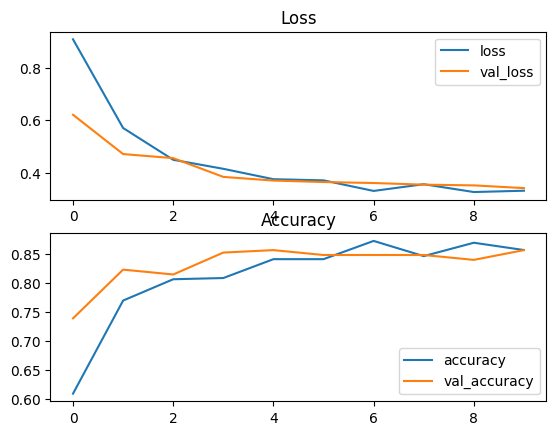

In [28]:
plot_loss_curves(resnet_model_history)

It looks like resnet50 is working very well but let try other model to get the best

## Resnet152

In [29]:
resnet152_url = "https://tfhub.dev/google/imagenet/resnet_v1_152/classification/5"

model_resnet152 = basefinetunemodel(resnet152_url)
model_resnet152.compile(loss = "categorical_crossentropy",
                        optimizer = 'Adam',
                        metrics = ['accuracy'])

In [30]:
model_resnet152_history = model_resnet152.fit(
    train_dataset,
    epochs=10,
    validation_data=Validation_dataset
)

Epoch 1/10
30/30 [==============================] - 19s 233ms/step - loss: 1.6642 - accuracy: 0.5194 - val_loss: 0.7039 - val_accuracy: 0.6975
Epoch 2/10
30/30 [==============================] - 5s 155ms/step - loss: 0.7889 - accuracy: 0.7093 - val_loss: 0.6048 - val_accuracy: 0.7395
Epoch 3/10
30/30 [==============================] - 5s 162ms/step - loss: 0.6060 - accuracy: 0.7566 - val_loss: 0.5909 - val_accuracy: 0.7395
Epoch 4/10
30/30 [==============================] - 5s 156ms/step - loss: 0.5382 - accuracy: 0.7922 - val_loss: 0.5398 - val_accuracy: 0.7689
Epoch 5/10
30/30 [==============================] - 5s 159ms/step - loss: 0.5088 - accuracy: 0.7954 - val_loss: 0.5108 - val_accuracy: 0.7899
Epoch 6/10
30/30 [==============================] - 5s 176ms/step - loss: 0.4840 - accuracy: 0.8143 - val_loss: 0.5548 - val_accuracy: 0.7563
Epoch 7/10
30/30 [==============================] - 5s 159ms/step - loss: 0.4507 - accuracy: 0.8048 - val_loss: 0.4646 - val_accuracy: 0.7899
Epoch

In [31]:
model_resnet152.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Augumentation_layer (Seque  (160, 160, 3)             0         
 ntial)                                                          
                                                                 
 Feature_Extraction_Layer (  (None, 1001)              60346281  
 KerasLayer)                                                     
                                                                 
 Output_Layer (Dense)        (None, 3)                 3006      
                                                                 
Total params: 60349287 (230.21 MB)
Trainable params: 3006 (11.74 KB)
Non-trainable params: 60346281 (230.20 MB)
_________________________________________________________________


## Evaluation

In [32]:
Resnet152_loss, Resnet152_acc = model_resnet152.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {Resnet_acc*100:.2f}%')

8/8 - 1s - loss: 0.5088 - accuracy: 0.7731 - 1s/epoch - 150ms/step
Test accuracy: 85.71%


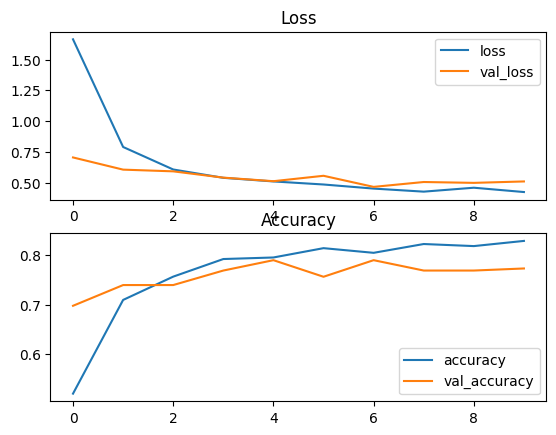

In [33]:
plot_loss_curves(model_resnet152_history)

## Effecient Net

In [34]:
efficient_net_url = "https://tfhub.dev/google/efficientnet/b5/feature-vector/1"

In [35]:
model_effecientnet = basefinetunemodel(efficient_net_url)

model_effecientnet.compile(loss = "categorical_crossentropy",
                        optimizer = 'Adam',
                        metrics = ['accuracy'])

In [36]:
model_effecientnet_history = model_effecientnet.fit(
    train_dataset,
    epochs=10,
    validation_data=Validation_dataset
)

Epoch 1/10
30/30 [==============================] - 19s 267ms/step - loss: 0.8232 - accuracy: 0.6013 - val_loss: 0.6253 - val_accuracy: 0.7185
Epoch 2/10
30/30 [==============================] - 5s 148ms/step - loss: 0.6266 - accuracy: 0.7219 - val_loss: 0.5419 - val_accuracy: 0.7521
Epoch 3/10
30/30 [==============================] - 5s 157ms/step - loss: 0.5482 - accuracy: 0.7650 - val_loss: 0.4996 - val_accuracy: 0.7773
Epoch 4/10
30/30 [==============================] - 5s 158ms/step - loss: 0.5262 - accuracy: 0.7880 - val_loss: 0.4767 - val_accuracy: 0.7773
Epoch 5/10
30/30 [==============================] - 5s 154ms/step - loss: 0.4893 - accuracy: 0.8027 - val_loss: 0.4694 - val_accuracy: 0.7941
Epoch 6/10
30/30 [==============================] - 5s 155ms/step - loss: 0.4747 - accuracy: 0.8027 - val_loss: 0.4417 - val_accuracy: 0.7857
Epoch 7/10
30/30 [==============================] - 5s 150ms/step - loss: 0.4305 - accuracy: 0.8300 - val_loss: 0.4465 - val_accuracy: 0.8025
Epoch

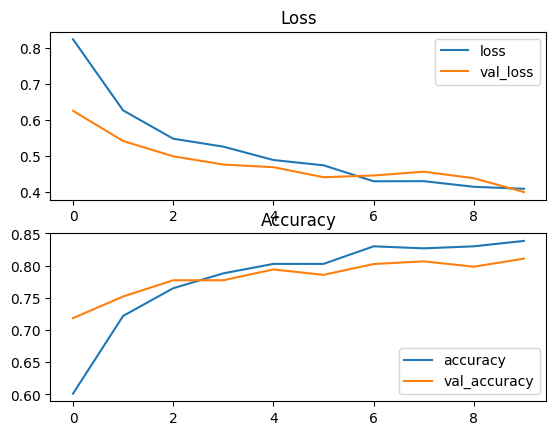

In [37]:
plot_loss_curves(model_effecientnet_history)

In [38]:
effecientnet_loss, effecientnet_acc = model_effecientnet.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {effecientnet_acc*100:.2f}%')

8/8 - 1s - loss: 0.4007 - accuracy: 0.8109 - 1s/epoch - 142ms/step
Test accuracy: 81.09%


In [39]:
model_effecientnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Augumentation_layer (Seque  (160, 160, 3)             0         
 ntial)                                                          
                                                                 
 Feature_Extraction_Layer (  (None, 2048)              28513520  
 KerasLayer)                                                     
                                                                 
 Output_Layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 28519667 (108.79 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 28513520 (108.77 MB)
_________________________________________________________________


## inception_net

In [40]:
inception_url = "https://tfhub.dev/google/imagenet/inception_v2/feature_vector/5"

model_inception = basefinetunemodel(inception_url)

model_inception.compile(loss = "categorical_crossentropy",
                        optimizer = 'Adam',
                        metrics = ['accuracy'])

In [41]:
model_inception_history = model_inception.fit(
    train_dataset,
    epochs=10,
    validation_data=Validation_dataset
)

Epoch 1/10
30/30 [==============================] - 11s 180ms/step - loss: 1.0953 - accuracy: 0.4806 - val_loss: 0.8664 - val_accuracy: 0.5504
Epoch 2/10
30/30 [==============================] - 2s 54ms/step - loss: 0.7294 - accuracy: 0.6642 - val_loss: 0.6583 - val_accuracy: 0.6597
Epoch 3/10
30/30 [==============================] - 2s 52ms/step - loss: 0.6309 - accuracy: 0.7020 - val_loss: 0.5989 - val_accuracy: 0.7101
Epoch 4/10
30/30 [==============================] - 2s 51ms/step - loss: 0.5702 - accuracy: 0.7398 - val_loss: 0.5237 - val_accuracy: 0.7647
Epoch 5/10
30/30 [==============================] - 3s 91ms/step - loss: 0.5194 - accuracy: 0.7786 - val_loss: 0.5124 - val_accuracy: 0.7521
Epoch 6/10
30/30 [==============================] - 2s 51ms/step - loss: 0.4901 - accuracy: 0.7975 - val_loss: 0.4727 - val_accuracy: 0.7857
Epoch 7/10
30/30 [==============================] - 2s 51ms/step - loss: 0.4873 - accuracy: 0.7933 - val_loss: 0.4461 - val_accuracy: 0.7983
Epoch 8/10


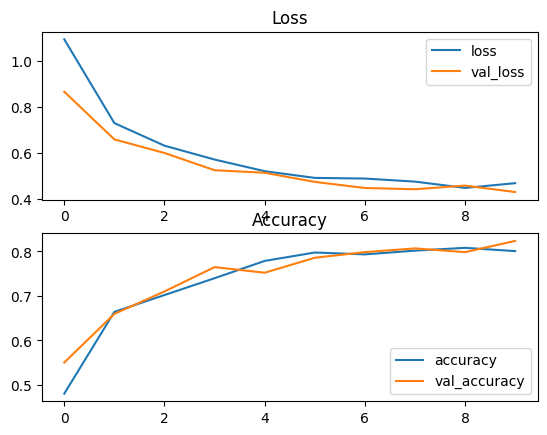

In [42]:
plot_loss_curves(model_inception_history)

In [43]:
model_inception.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Augumentation_layer (Seque  (160, 160, 3)             0         
 ntial)                                                          
                                                                 
 Feature_Extraction_Layer (  (None, 1024)              10173112  
 KerasLayer)                                                     
                                                                 
 Output_Layer (Dense)        (None, 3)                 3075      
                                                                 
Total params: 10176187 (38.82 MB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 10173112 (38.81 MB)
_________________________________________________________________


In [44]:
inception_loss, inception_acc = model_inception.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {inception_acc*100:.2f}%')

8/8 - 1s - loss: 0.4283 - accuracy: 0.8235 - 671ms/epoch - 84ms/step
Test accuracy: 82.35%


## Evaluation

In [50]:
print(f"Inception Model Accuracy:     {inception_acc*100:.2f}%, loss : {inception_loss:.2f}")
print(f"Effecient Net Model Accuracy: {effecientnet_acc*100:.2f}%, loss : {effecientnet_loss:.2f}")
print(f"ResNet50 Model Accuracy:      {Resnet_acc*100:.2f}%, loss : {Resnet_loss:.2f}")
print(f"ResNet152 Net Model Accuracy: {Resnet152_acc*100:.2f}%, loss : {Resnet152_loss:.2f}")

Inception Model Accuracy:     82.35%, loss : 0.43
Effecient Net Model Accuracy: 81.09%, loss : 0.40
ResNet50 Model Accuracy:      85.71%, loss : 0.34
ResNet152 Net Model Accuracy: 77.31%, loss : 0.51


Resnet has the highest accuracy. Lets try and improve it.

## Refunrishing best model

In [57]:
from keras.src.callbacks import EarlyStopping
# Create EarlyStopping and
filepath = "./Model/ResNet"

Modelckpt = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    save_best_only = True
)

EarlyStopping = tf.keras.callbacks.EarlyStopping(patience = 10)

In [58]:
resnet50_url = 'https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5'

model_resnet = basefinetunemodel(resnet50_url)

model_resnet.compile(loss = "categorical_crossentropy",
                        optimizer = 'Adam',
                        metrics = ['accuracy'])

In [ ]:
resnet_model_history = model_resnet.fit(
    train_dataset,
    epochs=500,
    validation_data=Validation_dataset,
    callbacks = [Modelckpt, EarlyStopping]
)

Epoch 1/500
30/30 [==============================] - 15s 344ms/step - loss: 1.1154 - accuracy: 0.5687 - val_loss: 0.6079 - val_accuracy: 0.7479
Epoch 2/500
30/30 [==============================] - 10s 351ms/step - loss: 0.6398 - accuracy: 0.7366 - val_loss: 0.5394 - val_accuracy: 0.7395
